### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from techniques import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Question 1

In [2]:
tweets = pd.read_csv('./train.csv')
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
x = tweets.drop(columns=['target'])
y = tweets['target']

x.shape, y.shape

((7613, 4), (7613,))

In [4]:
test_size = 0.10

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6851, 4), (762, 4), (6851,), (762,))

Text(0, 0.5, 'Records')

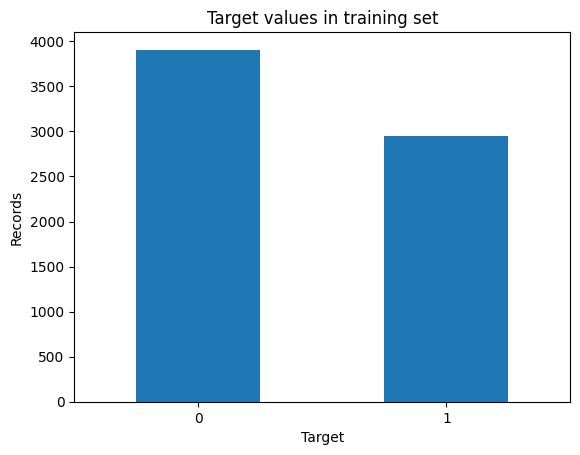

In [5]:
tr_counts = y_train.value_counts()

tr_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Target values in training set")
plt.xlabel("Target")
plt.ylabel("Records")


Text(0, 0.5, 'Records')

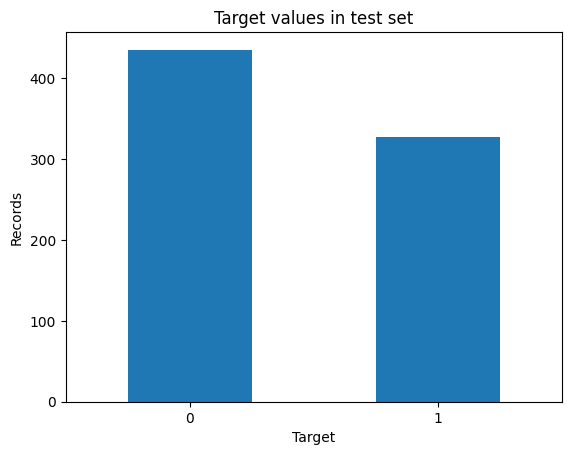

In [6]:
te_counts = y_test.value_counts()

te_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Target values in test set")
plt.xlabel("Target")
plt.ylabel("Records")

Με τη χρήση του Stratify βλέπουμε ότι, και το train και το test set, έχουν ίδια κατανομή των τιμών της target στήλης.

## Question 2

##### 1. Remove id and location columns

In [7]:
x_train = x_train.drop(columns=['id','location'])
x_test = x_test.drop(columns=['id', 'location'])

print(x_train.shape, x_test.shape)
x_train

(6851, 2) (762, 2)


,keyword,text
5304,outbreak,Families to sue over Legionnaires: More than 4...
3613,fatal,11-Year-Old Boy Charged With Manslaughter of T...
6458,suicide%20bombing,Remembering Marlene Menahem 22 of Moshav Safsu...
3506,explosion,The government is concerned about the populati...
5890,sandstorm,Watch This Airport Get Swallowed Up By A Sands...
...,...,...
6681,thunder,@OriginalFunko @Spencers THUNDER BUDDYS!!!! TH...
1847,crush,'@jorrynja: 6. @ your bf/gf/crush ??' @Ter_ell ??
232,annihilated,@stormbeard @steel_lord I seen Judas Priest in...
2761,devastation,70 Years After Atomic Bombs Japan Still Strugg...


##### 2. Fill NULL values

In [8]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

keyword    54
text        0
dtype: int64
keyword    7
text       0
dtype: int64


In [9]:
x_train = x_train.fillna(value="null")
x_test = x_test.fillna(value="null")

In [10]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())

keyword    0
text       0
dtype: int64
keyword    0
text       0
dtype: int64


##### 3. Concatenate keyword with text

In [11]:
x_train['inputs'] = x_train['keyword']+' '+x_train['text']
x_test['inputs'] = x_test['keyword']+' '+x_test['text']

x_train

,keyword,text,inputs
5304,outbreak,Families to sue over Legionnaires: More than 4...,outbreak Families to sue over Legionnaires: Mo...
3613,fatal,11-Year-Old Boy Charged With Manslaughter of T...,fatal 11-Year-Old Boy Charged With Manslaughte...
6458,suicide%20bombing,Remembering Marlene Menahem 22 of Moshav Safsu...,suicide%20bombing Remembering Marlene Menahem ...
3506,explosion,The government is concerned about the populati...,explosion The government is concerned about th...
5890,sandstorm,Watch This Airport Get Swallowed Up By A Sands...,sandstorm Watch This Airport Get Swallowed Up ...
...,...,...,...
6681,thunder,@OriginalFunko @Spencers THUNDER BUDDYS!!!! TH...,thunder @OriginalFunko @Spencers THUNDER BUDDY...
1847,crush,'@jorrynja: 6. @ your bf/gf/crush ??' @Ter_ell ??,crush '@jorrynja: 6. @ your bf/gf/crush ??' @T...
232,annihilated,@stormbeard @steel_lord I seen Judas Priest in...,annihilated @stormbeard @steel_lord I seen Jud...
2761,devastation,70 Years After Atomic Bombs Japan Still Strugg...,devastation 70 Years After Atomic Bombs Japan ...


## Question 3

In [12]:
x_train['inputs']

5304    outbreak Families to sue over Legionnaires: Mo...
3613    fatal 11-Year-Old Boy Charged With Manslaughte...
6458    suicide%20bombing Remembering Marlene Menahem ...
3506    explosion The government is concerned about th...
5890    sandstorm Watch This Airport Get Swallowed Up ...
                              ...                        
6681    thunder @OriginalFunko @Spencers THUNDER BUDDY...
1847    crush '@jorrynja: 6. @ your bf/gf/crush ??' @T...
232     annihilated @stormbeard @steel_lord I seen Jud...
2761    devastation 70 Years After Atomic Bombs Japan ...
920     blown%20up @Papcrdoll and I s2g if my mentions...
Name: inputs, Length: 6851, dtype: object

In [13]:
unicode = x_train['inputs'].astype(str).str.contains(r'\\u[0-9A-Fa-f]+')
print(unicode.sum())

tunicode = x_test['inputs'].astype(str).str.contains(r'\\u[0-9A-Fa-f]+')
print(tunicode.sum())

0
0


Βλέπουμε ότι τα κείμενά μας δεν περιέχουν non-ASCII χαρακτήρες για να χρησιμοποιήσουμε την removeUnicode.

Οπότε για να επεξεργαστούμε τα κείμενα των tweets περαιτέρω, θα χρησιμοποιήσουμε τις παρακάτω συναρτήσεις, για να αντικαταστήσουμε οτιδήποτε δεν περιέχει χρήσιμη πληροφορία για το μοντέλο μας:
1. replaceURL: Αντικαθιστά κάθε url(`www.example.com`) με τη λέξη url, για να λαμβάνει το ίδιο κάθε url το μοντέλο μας.
2. replaceAtUser: Αντικαθιστά κάθε tag (@username) με τη λέξη atUser, για να λαμβάνει το ίδιο κάθε tag το μοντέλο μας.
3. replaceMultiExclamationMark: Όταν το tweet έχει 2 ή περισσότερα θαυμαστικά τα αντικαθιστά με τη λέξη 'multiExclamation'. Αυτό το κάνουμε γιατί το μοντέλο λαμβάνει διαφορετικά τα 3 θαυμαστικά στη σειρά με τα 6.
4. replaceMultiQuestionMark: Όταν το tweet έχει 2 ή περισσότερα ερωτηματικά τα αντικαθιστά με τη λέξη 'multiQuestion'. Ο λόγος είναι ίδιος με αυτόν για τα θαυμαστικά.
5. removeHashtagInFrontOfWord: Αφαιρεί οποιοδήποτε hashtag(#) υπάρχει μπροστά από λέξεις.
6. removeEmoticons: Αφαιρεί οποιοδήποτε emoji μπορεί να περιέχει το κείμενο.

In [14]:
x_train['inputs'][5746]

'riot http://t.co/cxB55H37jn Rascal Flatts Riot Tour Atlantic City Beach Concert-August 20 2015-2 Tickets http://t.co/H6tyYSGR30'

In [15]:
x_train['inputs'] = x_train['inputs'].apply(replaceURL)
x_train['inputs'] = x_train['inputs'].apply(replaceAtUser)
x_train['inputs'] = x_train['inputs'].apply(replaceMultiExclamationMark)
x_train['inputs'] = x_train['inputs'].apply(replaceMultiQuestionMark)
x_train['inputs'] = x_train['inputs'].apply(removeHashtagInFrontOfWord)
x_train['inputs'] = x_train['inputs'].apply(removeEmoticons)


x_test['inputs'] = x_test['inputs'].apply(replaceURL)
x_test['inputs'] = x_test['inputs'].apply(replaceAtUser)
x_test['inputs'] = x_test['inputs'].apply(replaceMultiExclamationMark)
x_test['inputs'] = x_test['inputs'].apply(replaceMultiQuestionMark)
x_test['inputs'] = x_test['inputs'].apply(removeHashtagInFrontOfWord)
x_test['inputs'] = x_test['inputs'].apply(removeEmoticons)

In [16]:
x_train['inputs'][5746]

'riot url Rascal Flatts Riot Tour Atlantic City Beach Concert-August 20 2015-2 Tickets url'

Παραπάνω βλέπουμε ένα παράδειγμα για την αντικατάσταση του url.

## Question 4

In [17]:
train_inputs = np.array(x_train['inputs'])
test_inputs = np.array (x_test['inputs']) 
train_target = np.array(y_train)
test_target = np.array(y_test)

train_inputs.shape, test_inputs.shape, train_target.shape, test_target.shape

((6851,), (762,), (6851,), (762,))

## Question 5

In [18]:
vectorizer = TfidfVectorizer(analyzer='word')
pr_train_inputs = vectorizer.fit_transform(train_inputs)
pr_test_inputs = vectorizer.transform(test_inputs)

print(pr_train_inputs.shape)
pr_train_inputs[0].data

(6851, 14045)


array([0.45685608, 0.42264773, 0.09097628, 0.23924549, 0.17112765,
       0.45685608, 0.16629516, 0.1806755 , 0.22948294, 0.23284455,
       0.13500559, 0.07850442, 0.20646445, 0.09218621, 0.25065998,
       0.0600976 ])

## Question 6

In [19]:
svm = LinearSVC()
svm.fit(pr_train_inputs, train_target)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


##### Evaluation in training set

In [20]:
train_ypred = svm.predict(pr_train_inputs)

accuracy = round(accuracy_score(train_target, train_ypred)*100, 2)
precision = round(precision_score(train_target, train_ypred)*100, 2)
recall = round(recall_score(train_target, train_ypred)*100, 2)
f1 = round(f1_score(train_target, train_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {accuracy}")
print(f"SVM model's precision score  in training set: {precision}")
print(f"SVM model's recall score in training set: {recall}")
print(f"SVM model's f1 score in training set: {f1}")

SVM model's accuracy score in training set: 96.38
SVM model's precision score  in training set: 97.73
SVM model's recall score in training set: 93.75
SVM model's f1 score in training set: 95.7


##### Evaluation in test set

In [21]:
test_ypred = svm.predict(pr_test_inputs)

t_accuracy = round(accuracy_score(test_target, test_ypred)*100, 2)
t_precision = round(precision_score(test_target, test_ypred)*100, 2)
t_recall = round(recall_score(test_target, test_ypred)*100, 2)
t_f1 = round(f1_score(test_target, test_ypred)*100, 2)

print(f"SVM model's accuracy score in test set: {t_accuracy}")
print(f"SVM model's precision score  in test set: {t_precision}")
print(f"SVM model's recall score in test set: {t_recall}")
print(f"SVM model's f1 score in test set: {t_f1}")

SVM model's accuracy score in test set: 80.97
SVM model's precision score  in test set: 79.74
SVM model's recall score in test set: 74.62
SVM model's f1 score in test set: 77.09


Η σημαντικότερη μετρική για το πρόβλημά μας είναι το recall, διότι μεγιστοποιόντας το recall ελαχιστοποιούμε τα False Negatives, που στην περίπτωσή μας είναι να γίνει μία φυσική καταστροφή και εμείς να μην την εντοπίσουμε. Καλύτερα να υπάρχει ένα 'false alarm' παρά να μην εντοπίσουμε άμεσα μία καταστροφή που γίνεται.

## Question 7

In [22]:
pca = PCA(n_components=0.95)

dec_train_inputs = pca.fit_transform(pr_train_inputs.toarray())
dec_test_inputs = pca.transform(pr_test_inputs.toarray())

dec_train_inputs.shape, dec_test_inputs.shape

((6851, 3777), (762, 3777))

Βλέπουμε ότι για να κρατήσουμε το 95% της πληροφορίας, πήγαμε από τα 14045 features στα 3777 features.

In [23]:
linearSVM = LinearSVC()
rbfSVM = SVC(kernel='rbf')

In [24]:
linearSVM.fit(dec_train_inputs, train_target)
rbfSVM.fit(dec_train_inputs, train_target)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


##### Evaluation in training set

In [25]:
train_ypred = linearSVM.predict(dec_train_inputs)

linear_accuracy = round(accuracy_score(train_target, train_ypred)*100, 2)
linear_precision = round(precision_score(train_target, train_ypred)*100, 2)
linear_recall = round(recall_score(train_target, train_ypred)*100, 2)
linear_f1 = round(f1_score(train_target, train_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {linear_accuracy}")
print(f"SVM model's precision score  in training set: {linear_precision}")
print(f"SVM model's recall score in training set: {linear_recall}")
print(f"SVM model's f1 score in training set: {linear_f1}")

SVM model's accuracy score in training set: 93.85
SVM model's precision score  in training set: 95.66
SVM model's recall score in training set: 89.78
SVM model's f1 score in training set: 92.62


In [26]:
train_ypred = rbfSVM.predict(dec_train_inputs)

rbf_accuracy = round(accuracy_score(train_target, train_ypred)*100, 2)
rbf_precision = round(precision_score(train_target, train_ypred)*100, 2)
rbf_recall = round(recall_score(train_target, train_ypred)*100, 2)
rbf_f1 = round(f1_score(train_target, train_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {rbf_accuracy}")
print(f"SVM model's precision score  in training set: {rbf_precision}")
print(f"SVM model's recall score in training set: {rbf_recall}")
print(f"SVM model's f1 score in training set: {rbf_f1}")

SVM model's accuracy score in training set: 94.5
SVM model's precision score  in training set: 97.48
SVM model's recall score in training set: 89.5
SVM model's f1 score in training set: 93.32


##### Evaluation in test set

In [27]:
test_ypred = linearSVM.predict(dec_test_inputs)

t_linear_accuracy = round(accuracy_score(test_target, test_ypred)*100, 2)
t_linear_precision = round(precision_score(test_target, test_ypred)*100, 2)
t_linear_recall = round(recall_score(test_target, test_ypred)*100, 2)
t_linear_f1 = round(f1_score(test_target, test_ypred)*100, 2)

print(f"Linear SVM model's accuracy score in test set: {t_linear_accuracy}")
print(f"Linear SVM model's precision score  in test set: {t_linear_precision}")
print(f"Linear SVM model's recall score in test set: {t_linear_recall}")
print(f"Linear SVM model's f1 score in test set: {t_linear_f1}")

Linear SVM model's accuracy score in test set: 82.15
Linear SVM model's precision score  in test set: 80.71
Linear SVM model's recall score in test set: 76.76
Linear SVM model's f1 score in test set: 78.68


In [28]:
test_ypred = rbfSVM.predict(dec_test_inputs)

t_rbf_accuracy = round(accuracy_score(test_target, test_ypred)*100, 2)
t_rbf_precision = round(precision_score(test_target, test_ypred)*100, 2)
t_rbf_recall = round(recall_score(test_target, test_ypred)*100, 2)
t_rbf_f1 = round(f1_score(test_target, test_ypred)*100, 2)

print(f"rbf-SVM model's accuracy score in test set: {t_rbf_accuracy}")
print(f"rbf-SVM model's precision score  in test set: {t_rbf_precision}")
print(f"rbf-SVM model's recall score in test set: {t_rbf_recall}")
print(f"rbf-SVM model's f1 score in test set: {t_rbf_f1}")

rbf-SVM model's accuracy score in test set: 83.07
rbf-SVM model's precision score  in test set: 82.14
rbf-SVM model's recall score in test set: 77.37
rbf-SVM model's f1 score in test set: 79.69


## Question 8

Για την παράμετρο gamma, που καθορίζει το πόσο αυστηρή θα είναι η γραμμή που χωρίζει τις κλάσσεις των δεδομένων μας και το πόσο smooth θα είναι το μοντέλο μας, χρησιμοποιείται ως default η τιμή scale, που σημαίνει ότι έχει τιμή ίση με:
- 1/(n_features * variance) = 1/(3777*0.00025) = 1/0.9485 = 1.05904

Ενώ για auto υπολογίζεται χωρίς το variance ως:
- 1/n_features = 1/3777 = 0.00026476

In [29]:
variance = dec_train_inputs.var()
print(round(variance, 5))

0.00025


In [30]:
rbfSVM = SVC(kernel='rbf', gamma='auto')
rbfSVM.fit(dec_train_inputs, train_target)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


##### Evaluation in training set

In [31]:
train_ypred = rbfSVM.predict(dec_train_inputs)

rbf_accuracy = round(accuracy_score(train_target, train_ypred)*100, 2)
rbf_precision = round(precision_score(train_target, train_ypred)*100, 2)
rbf_recall = round(recall_score(train_target, train_ypred)*100, 2)
rbf_f1 = round(f1_score(train_target, train_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {rbf_accuracy}")
print(f"SVM model's precision score  in training set: {rbf_precision}")
print(f"SVM model's recall score in training set: {rbf_recall}")
print(f"SVM model's f1 score in training set: {rbf_f1}")

SVM model's accuracy score in training set: 57.03
SVM model's precision score  in training set: 0.0
SVM model's recall score in training set: 0.0
SVM model's f1 score in training set: 0.0


C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


##### Evaluation in test set

In [32]:
test_ypred = rbfSVM.predict(dec_test_inputs)

t_rbf_auto_accuracy = round(accuracy_score(test_target, test_ypred)*100, 2)
t_rbf_auto_precision = round(precision_score(test_target, test_ypred)*100, 2)
t_rbf_auto_recall = round(recall_score(test_target, test_ypred)*100, 2)
t_rbf_auto_f1 = round(f1_score(test_target, test_ypred)*100, 2)

print(f"SVM model's accuracy score in test set: {t_rbf_auto_accuracy}")
print(f"SVM model's precision score  in test set: {t_rbf_auto_precision}")
print(f"SVM model's recall score in test set: {t_rbf_auto_recall}")
print(f"SVM model's f1 score in test set: {t_rbf_auto_f1}")

SVM model's accuracy score in test set: 57.09
SVM model's precision score  in test set: 0.0
SVM model's recall score in test set: 0.0
SVM model's f1 score in test set: 0.0


C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


##### Plot of all model's metrics

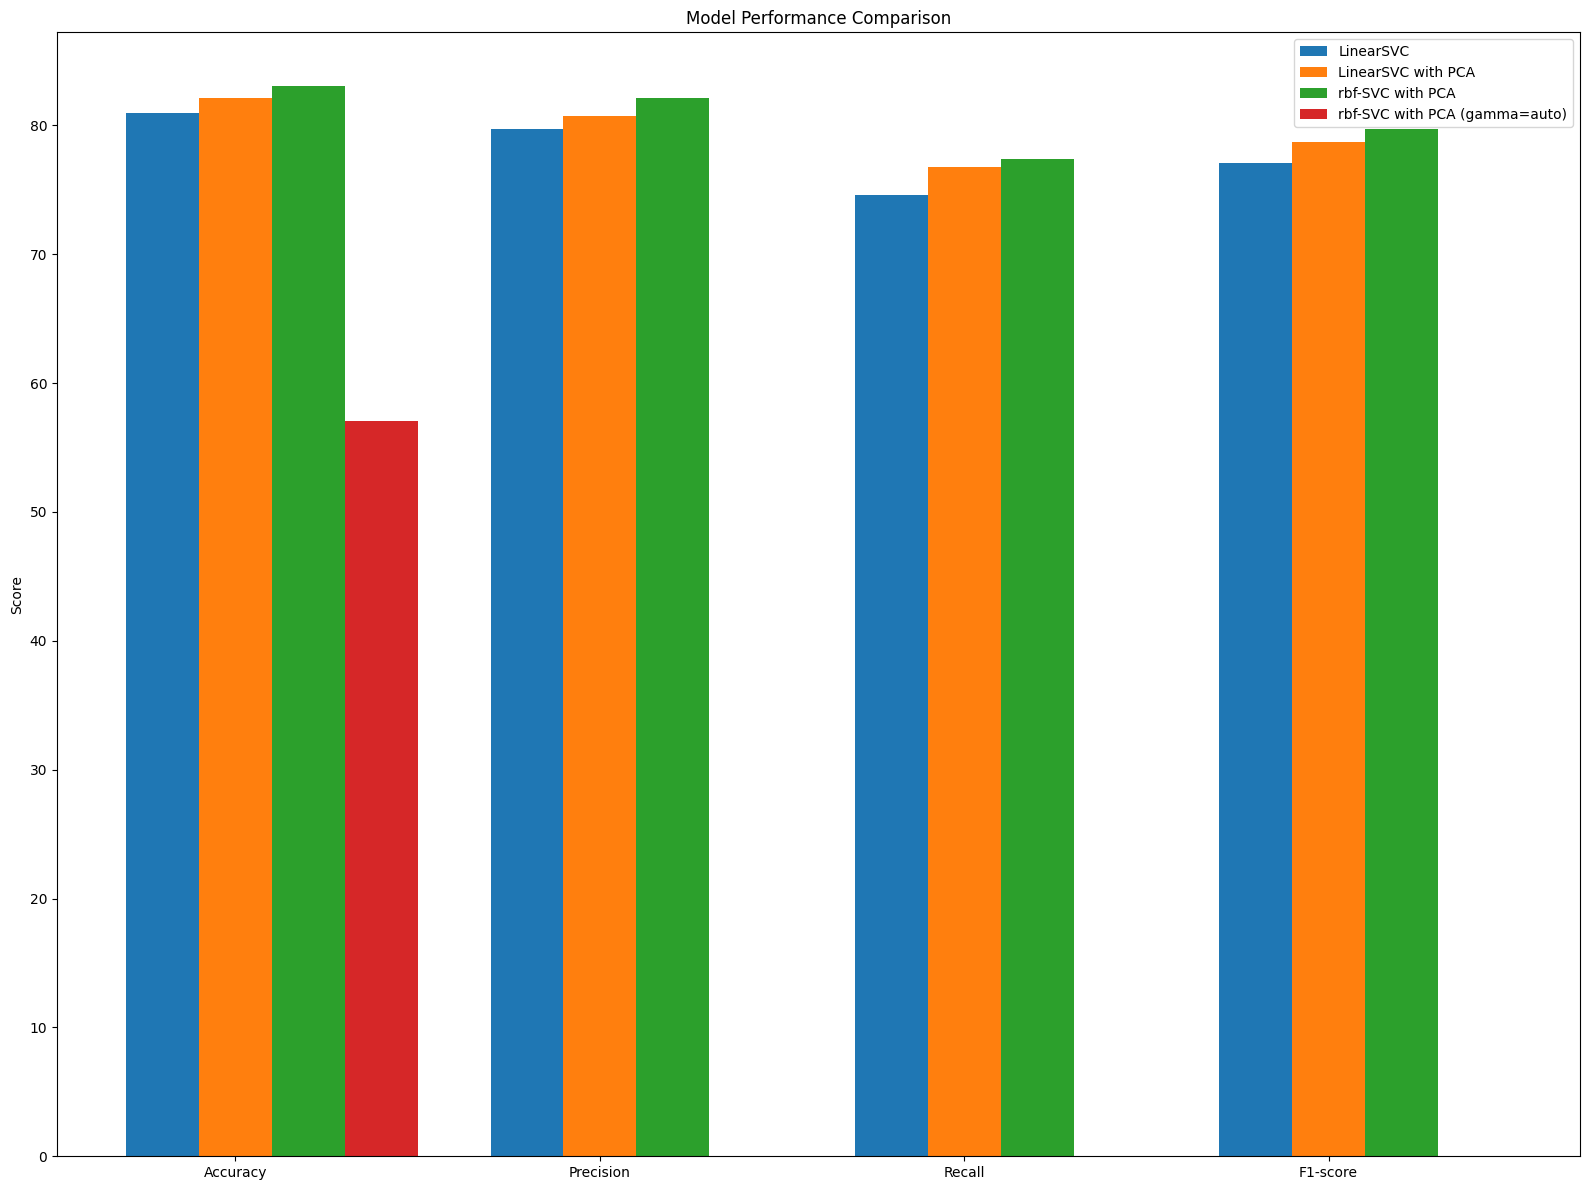

In [33]:
accuracies = [t_accuracy,t_linear_accuracy,t_rbf_accuracy,t_rbf_auto_accuracy]
precisions = [t_precision,t_linear_precision,t_rbf_precision,t_rbf_auto_precision]
recalls = [t_recall,t_linear_recall,t_rbf_recall,t_rbf_auto_recall]
f1s = [t_f1,t_linear_f1,t_rbf_f1,t_rbf_auto_f1]

metrics = np.array([accuracies, precisions, recalls, f1s])
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = ['LinearSVC', 'LinearSVC with PCA', 'rbf-SVC with PCA', 'rbf-SVC with PCA (gamma=auto)']

plt.figure(figsize=(16, 12))
x = np.arange(len(labels))
width = 0.2
for i in range(len(models)):
    plt.bar(x+(i*width), metrics[:, i], width, label=models[i])

plt.title('Model Performance Comparison')
plt.xticks(x+width, labels)
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

## Question 9

In [34]:
bayes_train_inputs = pr_train_inputs.toarray()
bayes_test_inputs = pr_test_inputs.toarray()

In [35]:
nbayes = GaussianNB()
nbayes.fit(bayes_train_inputs, train_target)

,priors,None
,var_smoothing,1e-09


In [36]:
train_ypred = nbayes.predict(bayes_train_inputs)

bayes_accuracy = round(accuracy_score(train_target, train_ypred)*100, 2)
bayes_precision = round(precision_score(train_target, train_ypred)*100, 2)
bayes_recall = round(recall_score(train_target, train_ypred)*100, 2)
bayes_f1 = round(f1_score(train_target, train_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {bayes_accuracy}")
print(f"SVM model's precision score  in training set: {bayes_precision}")
print(f"SVM model's recall score in training set: {bayes_recall}")
print(f"SVM model's f1 score in training set: {bayes_f1}")

SVM model's accuracy score in training set: 88.15
SVM model's precision score  in training set: 78.38
SVM model's recall score in training set: 100.0
SVM model's f1 score in training set: 87.88


In [37]:
test_ypred = nbayes.predict(bayes_test_inputs)

t_bayes_accuracy = round(accuracy_score(test_target, test_ypred)*100, 2)
t_bayes_precision = round(precision_score(test_target, test_ypred)*100, 2)
t_bayes_recall = round(recall_score(test_target, test_ypred)*100, 2)
t_bayes_f1 = round(f1_score(test_target, test_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {t_bayes_accuracy}")
print(f"SVM model's precision score  in training set: {t_bayes_precision}")
print(f"SVM model's recall score in training set: {t_bayes_recall}")
print(f"SVM model's f1 score in training set: {t_bayes_f1}")

SVM model's accuracy score in training set: 59.06
SVM model's precision score  in training set: 51.49
SVM model's recall score in training set: 79.51
SVM model's f1 score in training set: 62.5


Άμα όμως τεστάρουμε τον naive bayes στα δεδομένα που εφαρμόστηκε η PCA, έχουμε δραματικά καλύτερο ποσοστό στο recall που μας ενδιαφέρει. Παρόλα αυτά, πέφτει η απόδοση του accuracy, του precision, και του f1. 

In [38]:
nbayes_pca = GaussianNB()
nbayes_pca.fit(dec_train_inputs, train_target)

,priors,None
,var_smoothing,1e-09


In [39]:
train_ypred = nbayes_pca.predict(dec_train_inputs)

bayes_accuracy = round(accuracy_score(train_target, train_ypred)*100, 2)
bayes_precision = round(precision_score(train_target, train_ypred)*100, 2)
bayes_recall = round(recall_score(train_target, train_ypred)*100, 2)
bayes_f1 = round(f1_score(train_target, train_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {bayes_accuracy}")
print(f"SVM model's precision score  in training set: {bayes_precision}")
print(f"SVM model's recall score in training set: {bayes_recall}")
print(f"SVM model's f1 score in training set: {bayes_f1}")

SVM model's accuracy score in training set: 55.25
SVM model's precision score  in training set: 48.34
SVM model's recall score in training set: 60.26
SVM model's f1 score in training set: 53.64


In [40]:
test_ypred = nbayes_pca.predict(dec_test_inputs)

t_bayes_accuracy = round(accuracy_score(test_target, test_ypred)*100, 2)
t_bayes_precision = round(precision_score(test_target, test_ypred)*100, 2)
t_bayes_recall = round(recall_score(test_target, test_ypred)*100, 2)
t_bayes_f1 = round(f1_score(test_target, test_ypred)*100, 2)

print(f"SVM model's accuracy score in training set: {t_bayes_accuracy}")
print(f"SVM model's precision score  in training set: {t_bayes_precision}")
print(f"SVM model's recall score in training set: {t_bayes_recall}")
print(f"SVM model's f1 score in training set: {t_bayes_f1}")

SVM model's accuracy score in training set: 44.75
SVM model's precision score  in training set: 43.3
SVM model's recall score in training set: 92.97
SVM model's f1 score in training set: 59.09
